In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [2]:
df_hiking_data = pd.read_csv('./hiking_dataset.csv', delimiter = ',', header=None)

In [3]:
col_names = ['Windy?', 'Air Quality Good?', 'Hot?', 'Go Hiking?']


df_hiking_data.columns = col_names

col_names

['Windy?', 'Air Quality Good?', 'Hot?', 'Go Hiking?']

In [4]:
label_encoders = {}
for column in df_hiking_data.columns:
    le = LabelEncoder()
    df_hiking_data[column] = le.fit_transform(df_hiking_data[column])
    label_encoders[column] = le

In [5]:
X = df_hiking_data.drop('Go Hiking?', axis=1)
y = df_hiking_data['Go Hiking?']

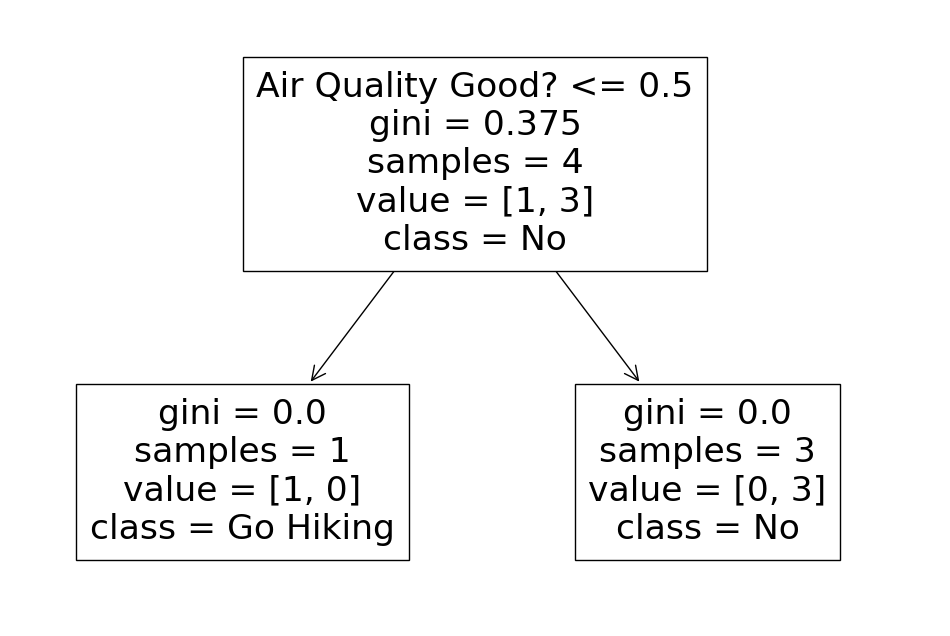

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=label_encoders['Go Hiking?'].classes_.tolist())
plt.show()

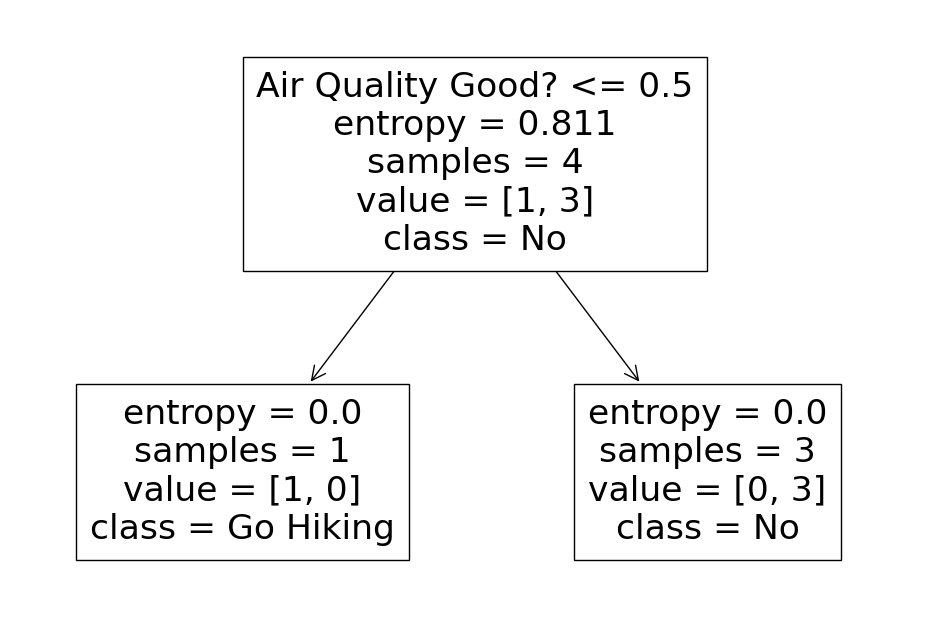

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=label_encoders['Go Hiking?'].classes_.tolist())
plt.show()
